(stability-chapter)=

# Stability

The stability of a numerical solver for ordinary differential equations refers to its ability to produce accurate and reliable solutions over a long interval, without the computed values of the solution becoming unbounded or oscillatory. In other words, a stable numerical solver for ODEs is one that does not produce solutions that blow up or oscillate wildly as time goes on.

For example, consider the Euler method solution to the following initial value problem using step lengths of $h = 0.25$ and $h = 0.125$

$$ y' = -15y, \qquad t \in [0, 1], \qquad y(0) = 1. $$

The exact solution for this initial value problem is $y = e^{-15t}$ and the numerical solutions are plotted against the exact solution in {numref}`stability-plot-1-figure`. Here we can see that the solution using $h = 0.125$ remains bounded whereas the solution using $h = 0.25$ diverges.

```{glue:figure} stability-plot-1
:name: stability-plot-1-figure
:figwidth: 600

Solutions to the initial value problem $y' = -15y$, $t\in [0, 1]$ and $y(0) = 1$ using the Euler method with $h=0.25$ and $h=0.125$.
```

The solution using $h = 0.125$ is an example of a **stable** solution where the numerical solution remains bounded whereas the solution using $h = 0.25$ is an example of an **unstable** solution which is unbounded. The reason for the instability is due to the truncation of the Taylor series. We saw in the section on [error analysis](error-analysis-section) that the higher order terms that are omitted due to truncation causes a [local truncation error](local-truncation-error-section), and the accumulation of these local truncation errors creates the [global truncation error](global-truncation-error-section). If the local truncation error is too large then the global truncation error will eventually diverge as seen in {numref}`stability-plot-1-figure` causing the solution to be unusable. This provides us with the definition of stability. 

````{prf:definition} Stability
:label: stability-definition

If $e_n$ is the local truncation error of a numerical method defined by

\begin{align*}
    e_n = |y(t_{n}) - y_{n}|,
\end{align*}
   
where $y(t_n)$ is the exact solution and $y_n$ the numerical approximation assuming that the solution at the previous step was exact. The method is considered **stable** if

$$ |e_{n+1} - e_n | \leq 1, $$(stability-equation)

for all steps of the method. If a method is not stable then it is **unstable**.
````

---

(stability-functions-section)=

## Stability functions

To examine the behaviour of the local truncation errors we use the following test equation

$$ y' = \lambda y. $$(test-equation)

This test equation is chosen as it is a simple ODE which has the solution $y=e^{\lambda t}$. Over a single step of a Runge-Kutta method, the values of $y_{n+1}$ are updated using the values of $y_n$, so the values of the local truncation error, $e_{n+1}$, are also updated using $e_n$ by the same method. This allows us to define a **stability function** for a method.

```{prf:definition} Stability function
:label: stability-function-definition

The **stability function** of a method, denoted by $R(z)$, is the rate of growth over a single step of the method when applied to calculate the solution of an ODE of the form $y'=\lambda t$ where $z = h \lambda$ and $h$ is the step size

$$ y_{n+1} = R(z)y_n. $$
```

For example, if the Euler method is used to solve the test equation $y'=\lambda y$ then the solution will be updated over one step using

$$ y_{n+1} = y_n + h f(t_n ,y_n) = y_n + h \lambda y_n, $$

Let $z = h\lambda$ then 

$$ y_{n+1} = y_n + z y_n =(1+z)y_n. $$

So the stability function of the Euler method is $R(z) = 1 + z$.


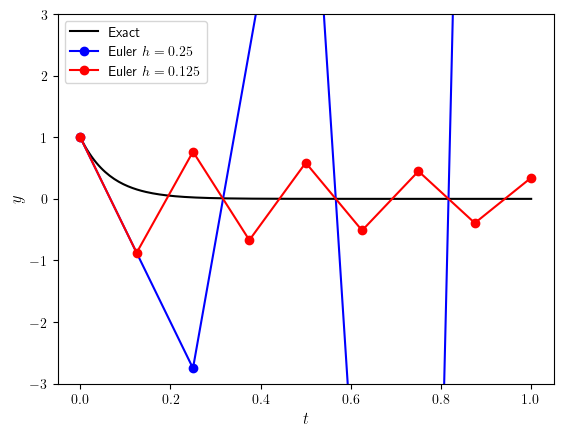

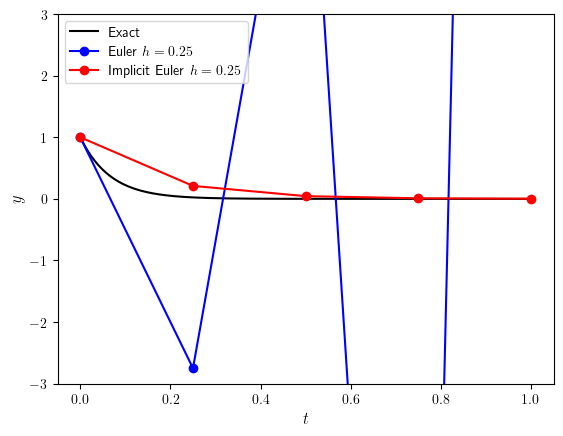

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

def euler(f, tspan, y0, h): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])
        
        # Calculate Euler method
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
        n += 1
        
    return t[:n+1], y[:n+1,:]


def implicit_euler(f, tspan, y0, h): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])
        
        # Calculate Euler method
        y[n+1,:] = y[n,:] / (1 + 15 * h)
        t[n+1] = t[n] + h
        n += 1
        
    return t[:n+1], y[:n+1,:]


# Define ODE function and exact solution
def f(t, y):
    return -15 * y

def exact(t):
    return np.exp(-15 * t)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h1 = 0.25       # step length
h2 = 0.125

# Calculate the solution to the IVP
t1, y1 = euler(f, tspan, y0, h1)
t2, y2 = euler(f, tspan, y0, h2)
t3, y3 = implicit_euler(f, tspan, y0, h1)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t1, y1, "bo-", label=f"Euler $h = {h1:0.2f}$")
plt.plot(t2, y2, "ro-", label=f"Euler $h = {h2:0.3f}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim([-3,3])
plt.legend()
plt.show()

from myst_nb import glue
glue("stability-plot-1", fig, display=False)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t1, y1, "bo-", label=f"Euler $h = {h1:0.2f}$")
plt.plot(t3, y3, "ro-", label=f"Implicit Euler $h = {h1:0.2f}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim([-3,3])
plt.legend(loc='upper left')
plt.show()

from myst_nb import glue
glue("stability-plot-2", fig, display=False)